In [77]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from collections import Counter

In [78]:
def calculate_profanity_degree(sentence, racist_words):
    profanity_count = 0
    total_count = 0
    words = sentence.lower().split()
    for word in words:
        total_count += 1
        if word in racist_words:
            profanity_count += 1
    return profanity_count / total_count if total_count > 0 else 0

with open('racist.txt', 'r') as f:
    racist_words = set(f.read().splitlines())

# Process tweets
with open('tweets.txt', 'r',encoding = 'utf-8') as f:
    tweets = f.readlines()

for tweet in tweets:
    degree = calculate_profanity_degree(tweet, racist_words)
    print(f"TWEET: {tweet.strip()}")
    print(f"Profanity Degree: {degree}\n")

TWEET: This cunt does not know how to play. This black monkey should go back to Africa
Profanity Degree: 0.0625

TWEET: This man should focus more on his  game.
Profanity Degree: 0.0

TWEET: These negros think that they are equal to us caucasians. If I get to do things my way, I will wipe out these pathetic monkeys.
Profanity Degree: 0.04

TWEET: This cunt should die.
Profanity Degree: 0.25

TWEET: The nigga does not deserve to live. Get out and go back to your country.
Profanity Degree: 0.06666666666666667

TWEET: These asian dudes are nothing compared to us caucasian. We should burn out their teeny-weeny eyes.
Profanity Degree: 0.0

TWEET: These brownies from India think that they are better than us. We should teach them a lesson.
Profanity Degree: 0.0

TWEET: These Indies should stay in their limits.
Profanity Degree: 0.0

TWEET: These black and coloured monkeys deserve to die.
Profanity Degree: 0.0

TWEET: I think this man should focus more on his career than other things.
Profanit

# seperate the words from tweets.txt which are matching in racist.txt

In [92]:
import pandas as pd

matched_words = []

for tweet in tweets:
    words = tweet.lower().split()
    for word in words:
        if word in racist_words:
            matched_words.append(word)

word_count = pd.Series(matched_words).value_counts().reset_index()
word_count.columns = ['Word', 'Count']
word_count

,Word,Count
0,racist,61
1,fucking,32
2,shit,32
3,fuck,29
4,stupid,12
...,...,...
57,douche,1
58,douchey,1
59,dafuq,1
60,shitty,1


In [93]:
# word_count['Count'] = np.log10(word_count['Count'])

In [94]:
df = word_count.set_index('Word')

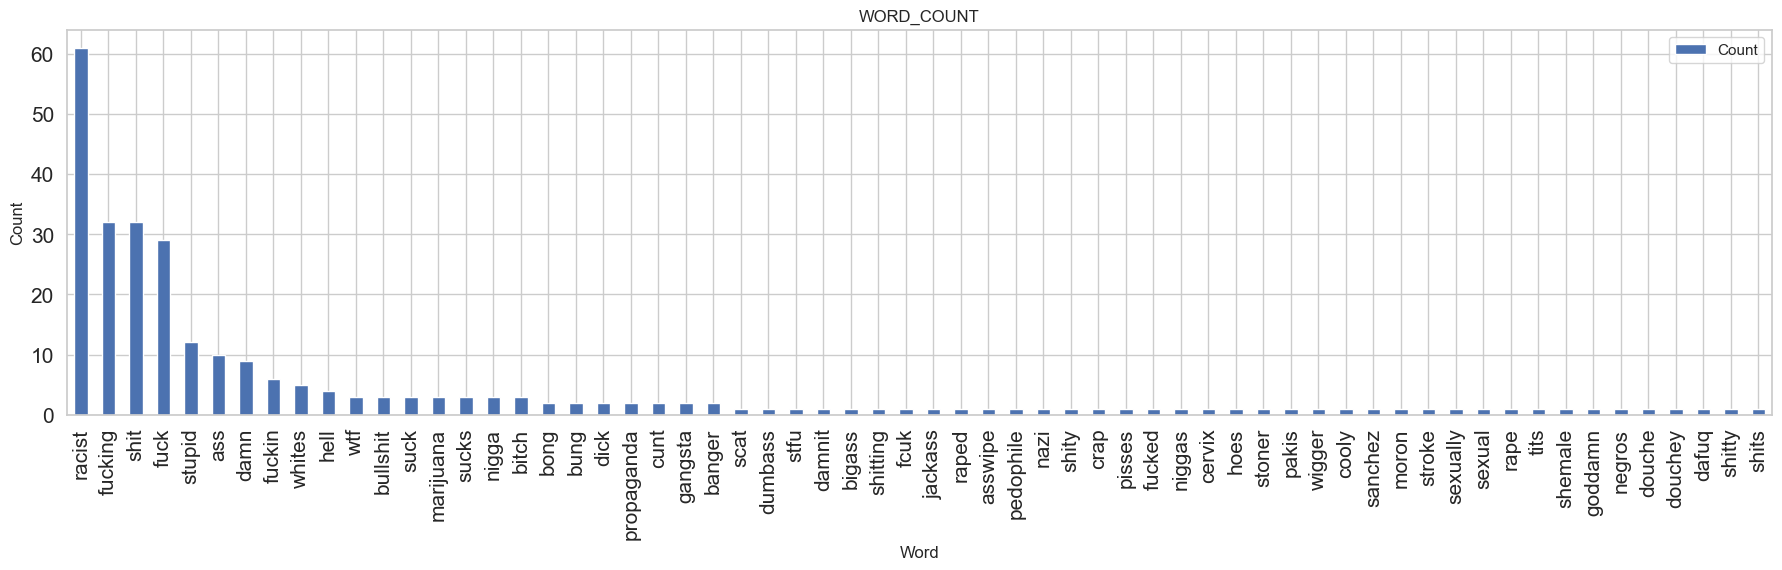

In [95]:
df.plot(kind='bar', title='WORD_COUNT',ylabel='Count', xlabel='Word', figsize=(22, 5))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('font', size=20) 

In [96]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count.set_index('Word')['Count'])

# most frequent occuring profanity words

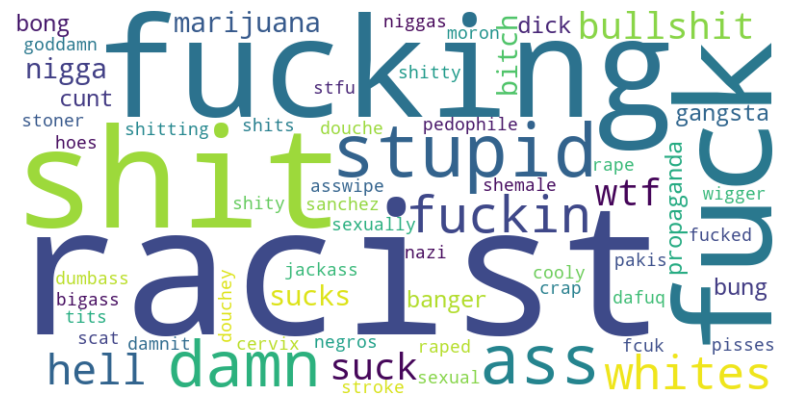

In [97]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()